<a href="https://colab.research.google.com/github/ChaconLima/mestrado/blob/introdu%C3%A7%C3%A3o-a-meta-heuristica/Projeto_2_Introdu%C3%A7%C3%A3o_a_Meta_Heuristicas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Meta heurística <b> Simulated Annealing</b>

O <b><i>Simulated Annealing</i></b>  é baseado nos princípios da mecânica estatística, segundo os quais o processo de recozimento requer aquecimento e resfriamento lento de uma substância para obter uma estrutura cristalina forte. A resistência da estrutura depende da taxa de resfriamento dos metais. Se a temperatura inicial não for suficientemente alta ou se for aplicado um resfriamento rápido, são obtidas imperfeições (estados metaestáveis). Nesse caso, o sólido resfriado não atingirá o equilíbrio térmico em cada temperatura. Cristais fortes são cultivados a partir de um resfriamento cuidadoso e lento. O algoritmo <b><i>Simulated Annealing</i></b> simula as variações de energia em um sistema submetido a um processo de resfriamento até que converja para um estado de equilíbrio (congelamento permanente). Este esquema foi desenvolvido em 1953 por Metropolis[543].


---


## <b>Analogia entre o sistema físico e o problema de otimização</b>

|Sistema Físico| Problema de Otimização|
|----|--------|
|Estado do sistema| Solução |
| Posição molecular |Variáveis ​​de decisão|
| Energia| Função objetivo|
|Estado fundamental|Solução ótima global|
|Estado metaestável|Ótimo local|
|Temperatura rápida|Pesquisa local|
|Temperatura|Parâmetro de controle T|
|Recozimento cuidadoso|Recozimento simulado|


---


Use todas as informações coletadas durante a pesquisa. A partir de uma solução inicial, <b><i>Simulated Annealing</i></b> prossegue em várias iterações. A cada iteração, um vizinho aleatório é gerado. Movimentos que melhoram a função de custo são sempre aceitos. Caso contrário, o vizinho é selecionado com uma dada probabilidade que depende da temperatura atual e da quantidade de degradação <b><i>ΔE</i></b> da função objetivo. <b><i>ΔE</i></b> representa a diferença no valor objetivo (energia) entre a solução atual e a solução vizinha gerada. À medida que o algoritmo avança, a probabilidade de tais movimentos serem aceitos diminui. Esta probabilidade segue, em Gerald, a distribuição de Boltzmann


### <b><i>P(ΔE,T)= e^[ - (f(s')-f(s))/ T]</i></b> 

Ele usa um parâmetro de controle, chamado temperatura, para determinar a probabilidade de aceitar soluções que não melhoram. Em um determinado nível de temperatura, muitos ensaios são explorados. Uma vez atingido o estado de equilíbrio, a temperatura diminui gradualmente.


---

##  <b>Template of Simulated Annealing Algorithm.</b> 

> <b>Entrada</b>: Esquema de resfriamento. </br>
> s=s0; <i>//Geração da solução inicial</i></br>
> T = Tmáx; <i>//Temperatura inicial</i></br>
> <b>Enquanto</b>;</br>
> > <b>Enquanto</b>; <i>//A uma temperatura fixa</i></br>
> > > Gera um vizinho aleatório s';</br>
> > > ΔE = f(s') - f(s);</br>
> > > <b>Se</b> ΔE <= 0 <b>Então</b> s=s' <i>//Aceite a solução vizinha<i></br>
> > > <b>Se não</b> Aceita s' com uma probabilidade <i><b>e^(-ΔE/T)</i></b>;</br>

> > <b>Fim enquanto</b> a condição de Equilíbrio; <i>//por exemplo, um determinado número de iterações executadas em cada temperatura T</i></br>
> > T = g(T); <i>//Atualização de temperatura</i></br>

> <b>Fim enquanto</b> critérios de parada satisfeitos T < Tmin;</br>
> <b>Saída</b>: Melhor solução encontrada.</br>





  



In [2]:
!pip install benchmark_functions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.1/46.1 kB 5.0 MB/s eta 0:00:00


In [3]:
#################################################################################################
# library Simulated Annealing - Copyright 2023 Mateus Chacon

# Este programa é um software livre, você pode redistribuí-lo e/ou modificá-lo 
# sob os termos da Licença Pública Geral GNU como publicada pela Fundação do Software Livre (FSF), 
# na versão 3 da Licença, ou (a seu critério) qualquer versão posterior.

# Este programa é distribuído na esperança de que possa ser útil, mas SEM NENHUMA GARANTIA, 
# e sem uma garantia implícita de ADEQUAÇÃO a qualquer MERCADO ou APLICAÇÃO EM PARTICULAR. 

# Veja a Licença Pública Geral GNU para mais detalhes <http://www.gnu.org/licenses/>
#################################################################################################

from math import exp
import benchmark_functions as bf
import matplotlib.pyplot as plt
import numpy as np
import random
import time
import copy

class Functions:
  def getFunction(self):
    match self.nameFunction:
        case 'Ackley':
            return bf.Ackley(n_dimensions=1)
        case 'Schwefel':
            return bf.Schwefel(n_dimensions=1)
        case 'Keane':
            return bf.Keane(n_dimensions=1)
        case 'Michalewicz':
            return bf.Michalewicz(n_dimensions=1)
        case 'EggHolder':
            return bf.EggHolder(n_dimensions=1)
        case 'Griewank':
            return bf.Griewank(n_dimensions=1)
        case 'DeJong3':
            return bf.DeJong3(n_dimensions=1)
        case 'Rastrigin':
            return bf.DeJong3(n_dimensions=1)
        case 'Hyperellipsoid':
            return bf.Hyperellipsoid(n_dimensions=1)
        case _:
            return bf.Hypersphere(n_dimensions=1) 

  def __init__(self, nameFunction='Hypersphere'):
    self.nameFunction = nameFunction

class Answer:
  def __init__(self, answer=[],eval=0):
    self.answer = copy.copy(answer)
    self.eval = copy.copy(eval)

  def getAnswer(self):
    return self.answer
  def getEval(self):
    return self.eval

class SimulatedAnnealing:

  def __init__(self, objective=Functions(),numberIterations=100, stepSize=0.1, temp=1, seed = 1):
    self.scores=[]
    random.seed(seed)
    self.anwser=Answer
    self.objective = objective.getFunction()
    self.numberIterations = numberIterations
    self.stepSize = stepSize
    self.temp = temp
    self.bounds = [self.objective.suggested_bounds()[0][0], self.objective.suggested_bounds()[1][0]]
    self.diffBounds = self.bounds[1]-self.bounds[0]

  def anwserInitial(self):
    answer = self.bounds[0] + random.random()*self.diffBounds  
    return Answer(answer,self.objective([answer]))

  def generateAnwserCandidate(self, curr):
    candidate = curr + random.random()*(self.diffBounds-curr)*self.stepSize
    return Answer(candidate, self.objective([candidate]))

  def generateReport(self):
    
    x = np.arange(self.bounds[0], self.bounds[1]+1, 0.1)
    y = []
    for xi in x:
        y.append(self.objective([xi]))

    plt.grid()
    plt.plot(x,y,'-b')
    plt.plot(self.anwser.getAnswer(),self.anwser.getEval(),'go')
    plt.xlabel('X axis')
    plt.ylabel('Y axis')
    plt.show()

    plt.plot(self.scores, '.-')
    plt.xlabel('Improvement number')
    plt.ylabel('Evaluation f(x)')
    plt.show()

  def execute(self):
    best = self.anwserInitial()
    curr = copy.copy(best)
    self.scores.append(best.getEval())

    for i in range(self.numberIterations):
      candidate = self.generateAnwserCandidate(curr.getAnswer())
      diff = candidate.getEval() - curr.getEval()
      if diff < 0:
        diff_global = candidate.getEval() - best.getEval()
        if diff_global < 0:
          best = copy.copy(candidate)
        curr = copy.copy(candidate)
        self.scores.append(curr.getEval())
      else:
        t = self.temp/(i+1)
        prob = exp(-diff/t)
        if random.random() < prob:
          curr  = copy.copy(candidate)

    self.anwser = best
    return {
        "x":best.getAnswer(),
        "y":best.getEval()
    }
    

Hypersphere


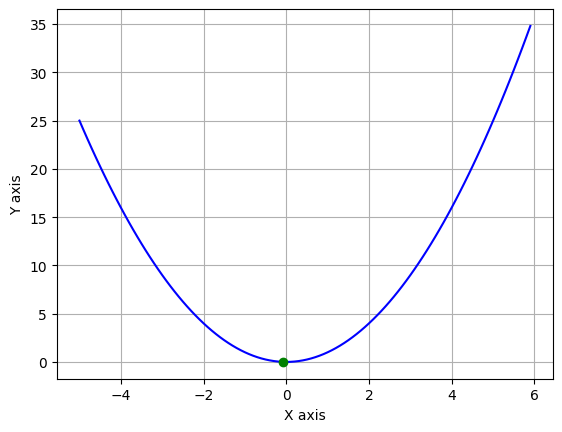

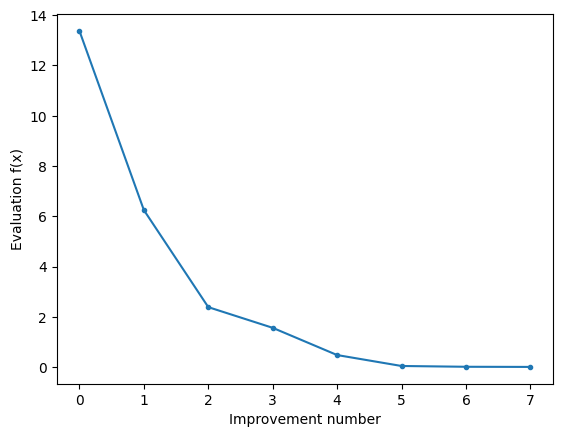

Ackley


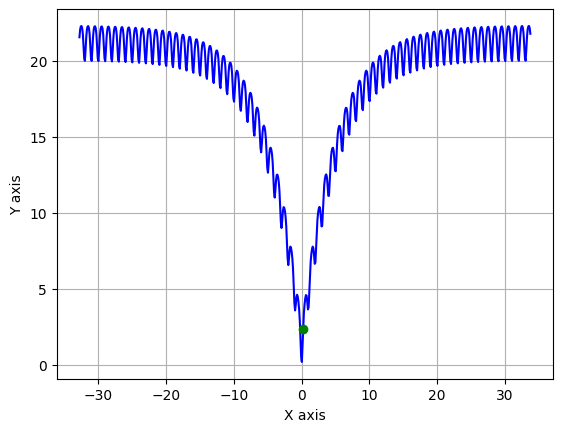

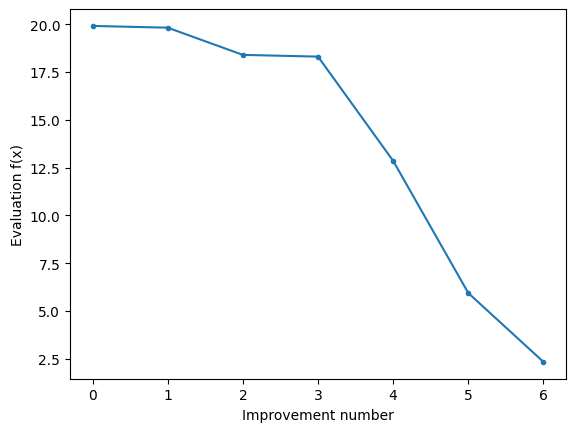

Schwefel


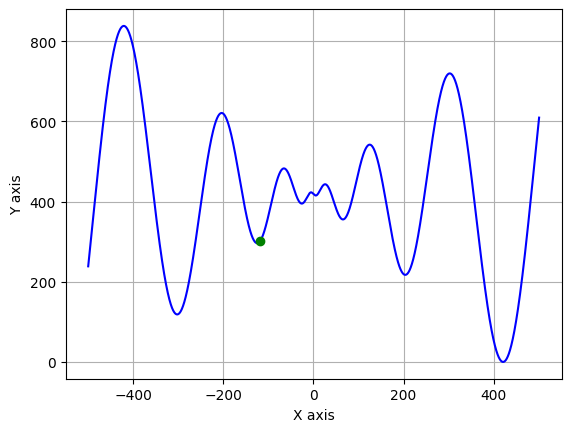

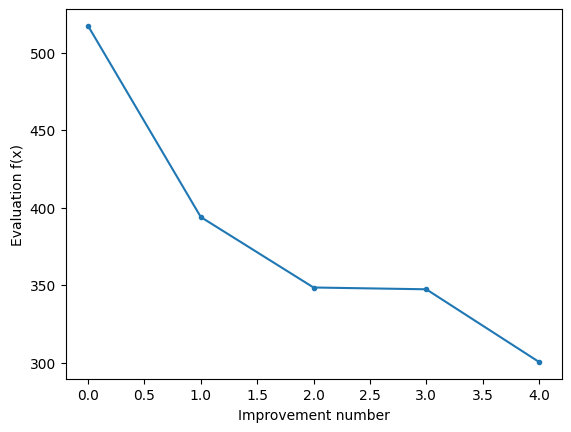

Keane


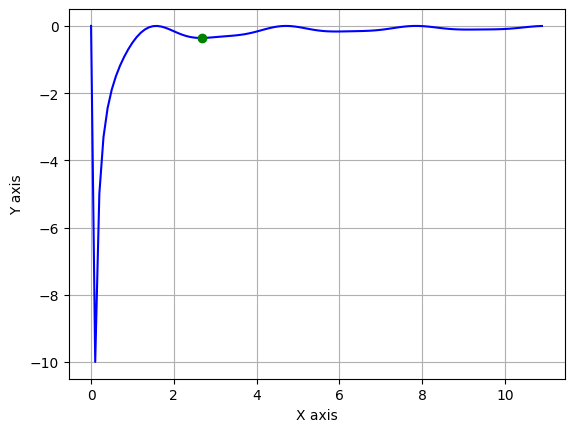

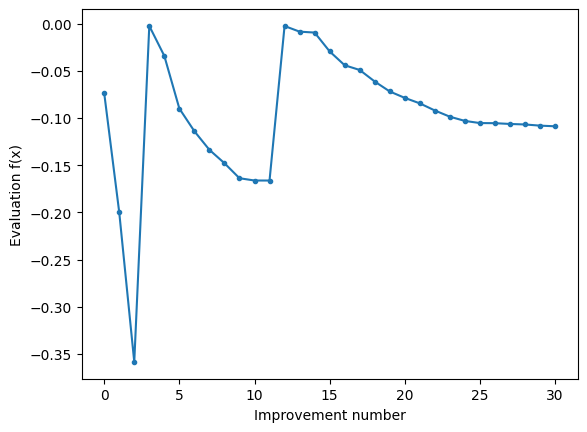

Michalewicz


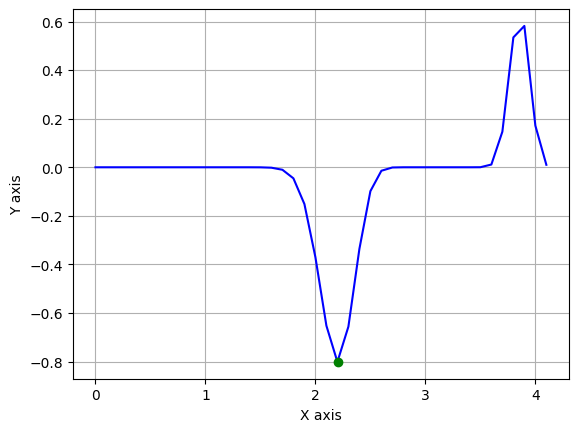

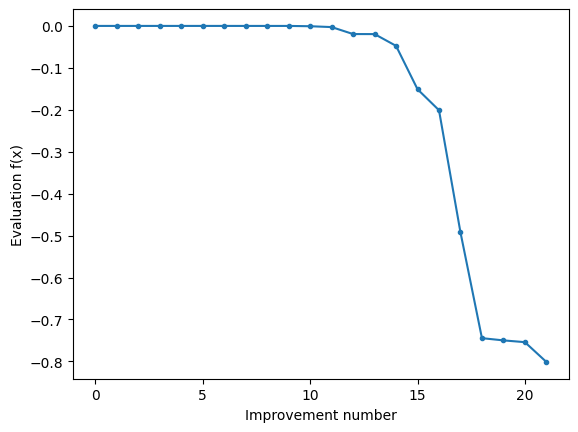

EggHolder


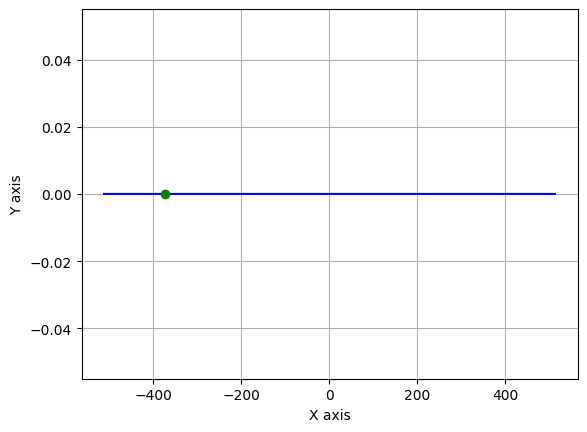

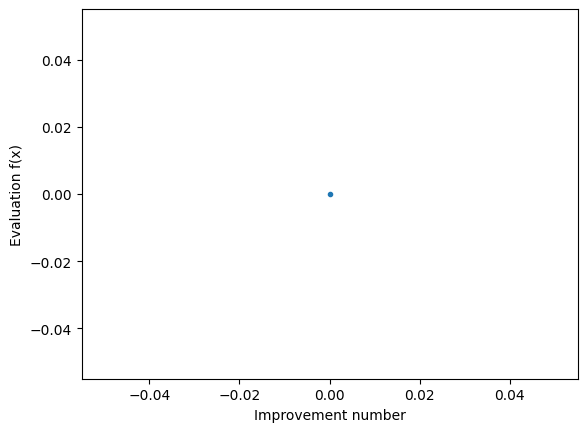

Griewank


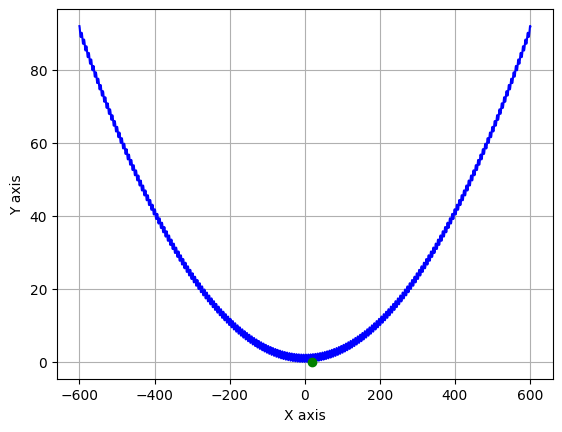

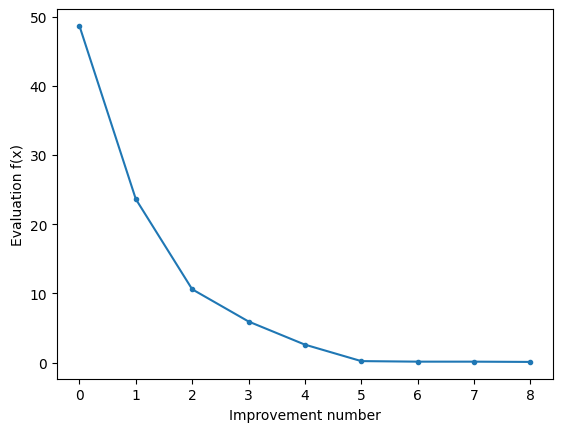

DeJong3


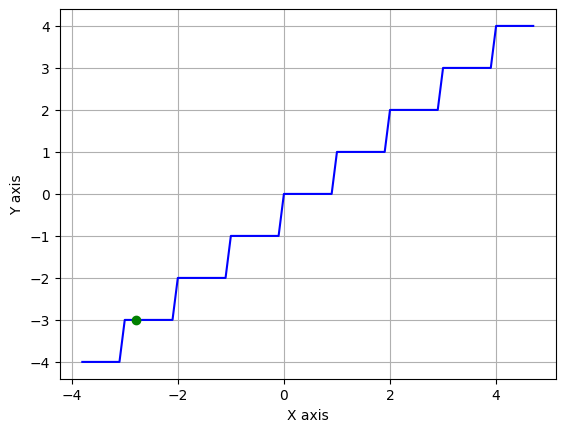

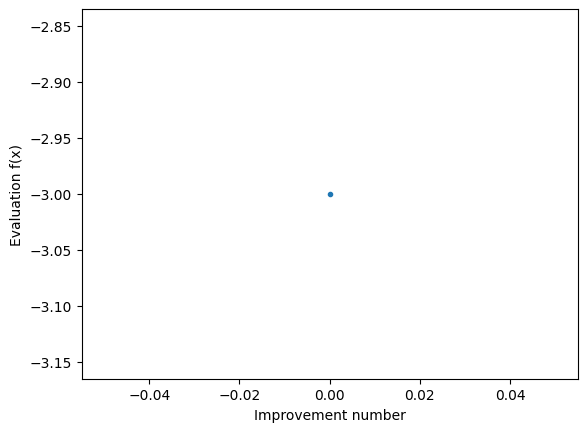

Rastrigin


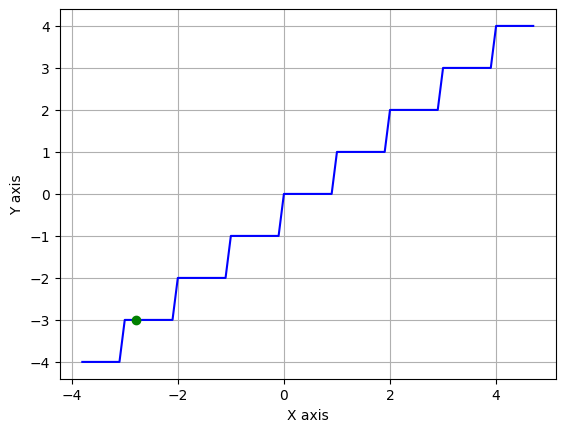

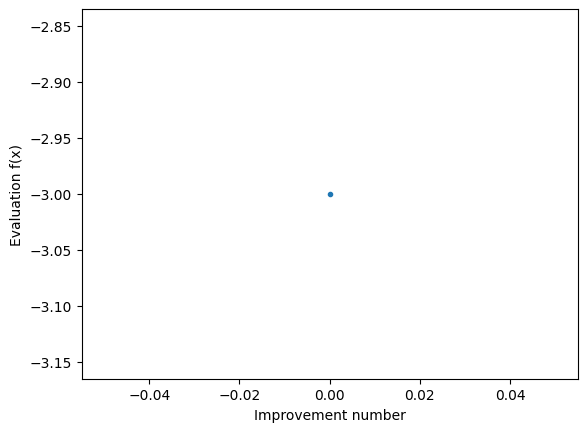

Hyperellipsoid


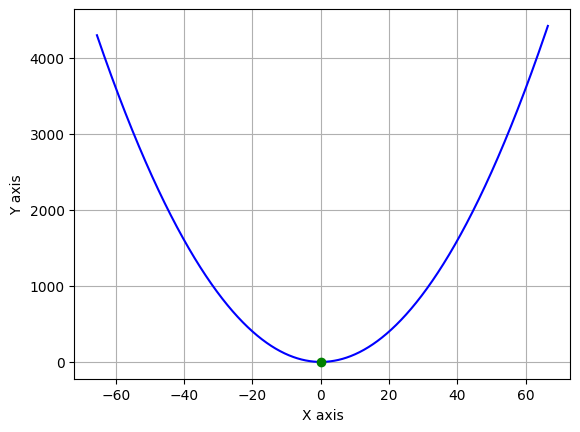

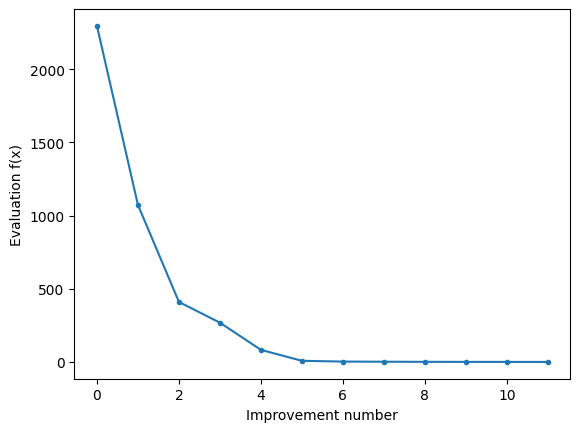

In [21]:
fx = ['Hypersphere','Ackley','Schwefel','Keane','Michalewicz','EggHolder','Griewank','DeJong3','Rastrigin','Hyperellipsoid']
for i in range(len(fx)):
  print("=====================================================================================================")
  print(fx[i])
  sa = SimulatedAnnealing(numberIterations = 100, stepSize=0.1, temp = 1,objective=Functions(fx[i]),seed=1)
  result=sa.execute()
  sa.generateReport()

Considerar os seguintes cenarios

|Iterações|Temperatura|Passo|
|----|----|----|
|10	|1	|1|
|10|	1|	0,1|
|10|	1|	0,01|
|10|	10|	1|
|10|	10|	0,1|
|10|	10|	0,01|
|10|	100|	1|
|10|	100|	0,1|
|10|	100|	0,01|
|100|	1|	1|
|100|	1|	0,1|
|100|	1|	0,01|
|100|	10|	1|
|100|	10|	0,1|
|100|	10|	0,01|
|100|	100|	1|
|100|	100|	0,1|
|100|	100|	0,01|
|1000|	1|	1|
|1000|	1|	0,1|
|1000|	1|	0,01|
|1000|	10|	1|
|1000|	10|	0,1|
|1000|	10|	0,01|
|1000|	100|	1|
|1000|	100|	0,1|
|1000|	100|	0,01|

In [20]:
fx = ['Hypersphere','Ackley','Schwefel','Keane','Michalewicz','EggHolder','Griewank','DeJong3','Rastrigin','Hyperellipsoid']

dados=[
[10,1,1],
[10,1,0.1],
[10,1,0.01],
[10,10,1],
[10,10,0.1],
[10,10,0.01],
[10,100,1],
[10,100,0.1],
[10,100,0.01],
[100,1,1],
[100,1,0.1],
[100,1,0.01],
[100,10,1],
[100,10,0.1],
[100,10,0.01],
[100,100,1],
[100,100,0.1],
[100,100,0.01],
[1000,1,1],
[1000,1,0.1],
[1000,1,0.01],
[1000,10,1],
[1000,10,0.1],
[1000,10,0.01],
[1000,100,1],
[1000,100,0.1],
[1000,100,0.01]]

listResult = []
for k in range(len(dados)):
  resultFunction = []
  for i in range(len(fx)):
    sa = SimulatedAnnealing(numberIterations = dados[k][0], stepSize=dados[k][2], temp = dados[k][1],objective=Functions(fx[i]),seed=1)
    result=sa.execute()
    resultFunction.append(result)
  listResult.append(resultFunction)
listResult

for k in range(len(fx)):
  x=[]
  y=[]
  fo = 100000000000000
  hi = 0
  for i in range(len(listResult)):
    x.append(i)
    y.append(listResult[i][k]['y'])

    if(listResult[i][k]['y'] < fo):
      hi = i
      fo = listResult[i][k]['y'] 
    
  print(fx[k], y)
  print("Melhor FO:",fo, "Iterações:",dados[hi][0], "Temperatura:",dados[hi][1], "Passo:",dados[hi][2])
  print("\n")

#   plt.title(fx[k])
#   plt.plot(x,y,'-b')
#   plt.grid()
#   plt.xlabel('hipoteses')
#   plt.ylabel('resultado f(x)')
  # plt.show()




Hypersphere [0.02994413636305977, 0.007647614177474846, 8.766452217491397, 0.02994413636305977, 0.044934034881134635, 8.766452217491397, 0.02994413636305977, 0.044934034881134635, 8.766452217491397, 0.02994413636305977, 0.007647614177474846, 8.704456368537709e-05, 0.02994413636305977, 0.044934034881134635, 8.704456368537709e-05, 0.02994413636305977, 0.044934034881134635, 8.704456368537709e-05, 0.02994413636305977, 0.007647614177474846, 8.704456368537709e-05, 0.02994413636305977, 0.044934034881134635, 8.704456368537709e-05, 0.02994413636305977, 0.044934034881134635, 8.704456368537709e-05]
Melhor FO: 8.704456368537709e-05 Iterações: 100 Temperatura: 1 Passo: 0.01


Ackley [4.830951159280975, 18.303486991000533, 19.908996241895583, 19.908996241895583, 8.497595249661927, 19.817050654081932, 19.908996241895583, 8.497595249661927, 19.817050654081932, 3.630648352707372, 2.3384439026932857, 19.800320098806385, 19.908996241895583, 8.497595249661927, 19.12548162559825, 19.908996241895583, 8.4975